In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [4]:
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [6]:
print(df.duplicated().sum())

0


In [8]:
print(df.isnull().sum())
df["Age"] = df["Age"].fillna(df["Age"].mean())
print(df["Age"])

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


In [10]:
df_n = df.drop("Cabin", axis=1)
print(df_n.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64


In [11]:
print(df_n[df_n["Embarked"].isnull()])

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Embarked  
61   female  38.0      0      0  113572  80.0      NaN  
829  female  62.0      0      0  113572  80.0      NaN  


In [12]:
df_n["Embarked"] = df_n["Embarked"].fillna("Z")

In [14]:
print(df_n["Embarked"].unique())

['S' 'C' 'Q' 'Z']


In [15]:
le = LabelEncoder()
df_n["Embarked"] = le.fit_transform(df_n["Embarked"])
print(df_n["Embarked"].unique())

[2 0 1 3]


In [18]:
print(df_n[["Age"]])

          Age
0   -0.592481
1    0.638789
2   -0.284663
3    0.407926
4    0.407926
..        ...
886 -0.207709
887 -0.823344
888  0.000000
889 -0.284663
890  0.177063

[891 rows x 1 columns]


In [ ]:
stdC = StandardScaler()
df_n["Age"] = stdC.fit_transform(df_n[["Age"]])


In [56]:
# Sorting
print(df_n[["Name", "Sex","Age"]].sort_values(by="Age"))
#print(df[["Name", "Sex","Age"]].sort_values(by="Age"))

                                     Name     Sex       Age
803       Thomas, Master. Assad Alexander    male -2.253155
755             Hamalainen, Master. Viljo    male -2.233917
644                Baclini, Miss. Eugenie  female -2.227761
469         Baclini, Miss. Helene Barbara  female -2.227761
831       Richards, Master. George Sibley    male -2.221604
..                                    ...     ...       ...
116                  Connors, Mr. Patrick    male  3.139805
96              Goldschmidt, Mr. George B    male  3.178283
493               Artagaveytia, Mr. Ramon    male  3.178283
851                   Svensson, Mr. Johan    male  3.409146
630  Barkworth, Mr. Algernon Henry Wilson    male  3.870872

[891 rows x 3 columns]


In [22]:
mufare = df_n["Fare"].mean()
df_n["Status"] = df["Fare"].apply(lambda x : "Rich" if x > mufare else "Poor")
print(df_n[["Fare", "Status"]])

        Fare Status
0     7.2500   Poor
1    71.2833   Rich
2     7.9250   Poor
3    53.1000   Rich
4     8.0500   Poor
..       ...    ...
886  13.0000   Poor
887  30.0000   Poor
888  23.4500   Poor
889  30.0000   Poor
890   7.7500   Poor

[891 rows x 2 columns]


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


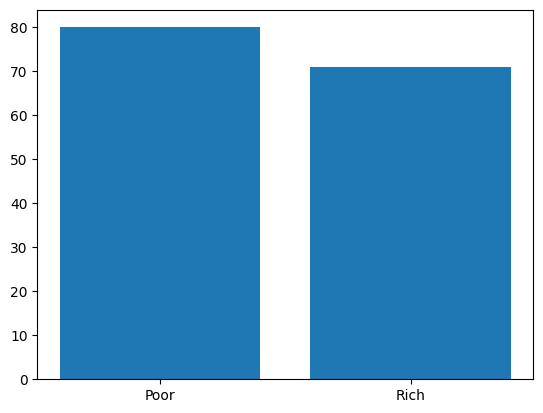

In [25]:
print(df["Age"])
plt.bar(df_n["Status"], height=df["Age"])
plt.show()